In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib import pyplot as plt    


ModuleNotFoundError: No module named 'xgboost'

C:\Users\anura\AppData\Local\Temp\ipykernel_19024\4035746574.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  "airconditioning","prefarea"]].replace({"yes":1,"yxes":1,"no":0})


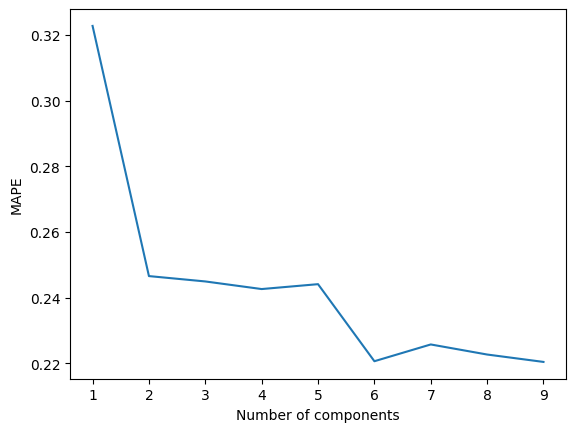

In [6]:
df=pd.read_csv("Housing.csv")

Encoder=OrdinalEncoder(categories=[["unfurnished","semi-furnished","furnished"]])

df["furnishingstatus"]=Encoder.fit_transform(df[["furnishingstatus"]])

df[["mainroad","guestroom","basement","hotwaterheating",
   "airconditioning","prefarea"]]=df[["mainroad","guestroom","basement","hotwaterheating",
                                    "airconditioning","prefarea"]].replace({"yes":1,"yxes":1,"no":0})


X=df.drop(columns="price")
y=df["price"]
dictmape={}


n_comp=np.arange(1,10,1)
for i in n_comp:
    pca=PCA(n_components=i)
    X_pca=pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    model=LinearRegression()
    model.fit(X_train,y_train)
    Predictions=model.predict(X_test)
    mape=mean_absolute_percentage_error(y_test,Predictions)
    dictmape[i]=mape

plt.plot(dictmape.keys(),dictmape.values())
plt.xlabel('Number of components')
plt.ylabel('MAPE')

plt.show()

